In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [22]:
df = pd.read_csv("cleaned_olx_iphone.csv")

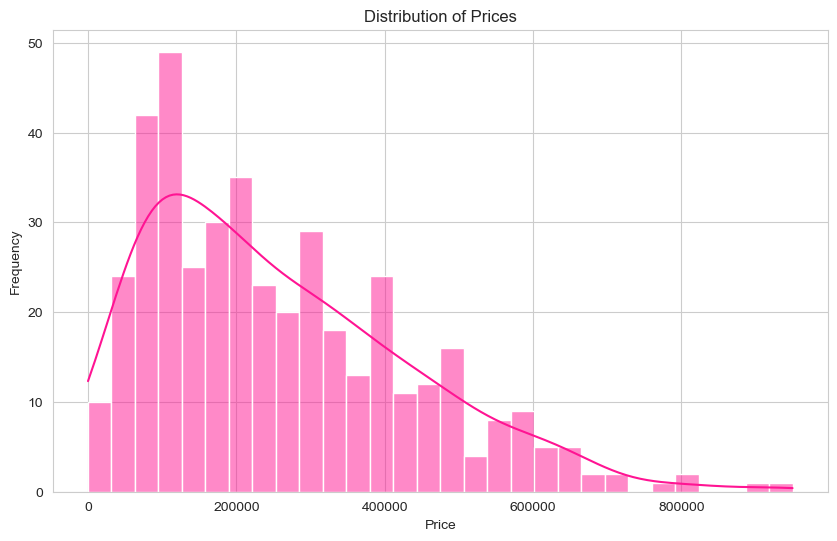

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='#FF1493')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

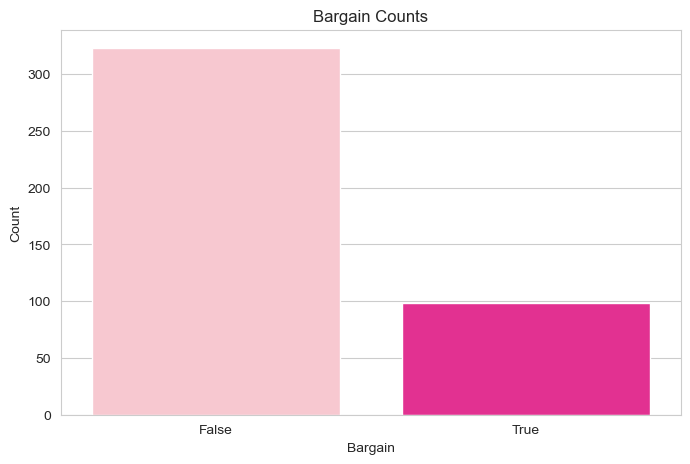

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Bargain', data=df, hue='Bargain', dodge=False, palette=['pink', '#FF1493'])  
plt.title('Bargain Counts')
plt.xlabel('Bargain')
plt.ylabel('Count')
plt.legend([], [], frameon=False) 
plt.show()

/var/folders/h1/w4wlfqg16874p57ddm4lpvzr0000gp/T/ipykernel_98131/1380954331.py:15: UserWarning: 
The palette list has fewer values (10) than needed (57) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(x='City', y='Price', data=df, palette=pink_gradient, hue='City')
/var/folders/h1/w4wlfqg16874p57ddm4lpvzr0000gp/T/ipykernel_98131/1380954331.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)
/var/folders/h1/w4wlfqg16874p57ddm4lpvzr0000gp/T/ipykernel_98131/1380954331.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside the plot


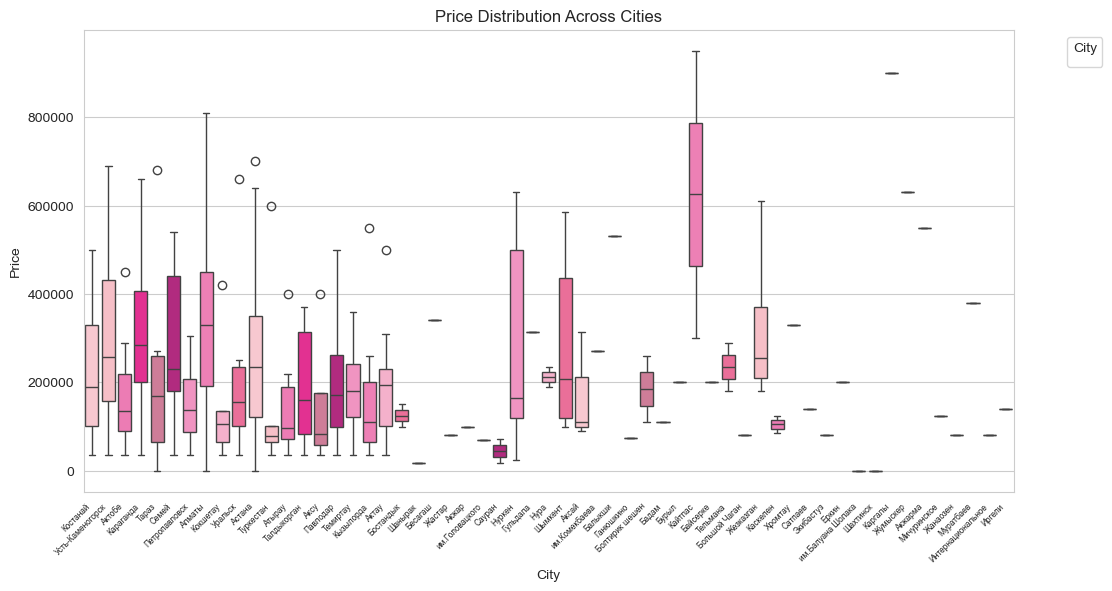

In [25]:
pink_gradient = sns.color_palette([
    "#FFC0CB",  # Light Pink
    "#FFB6C1",  # Light Pink 2
    "#FF69B4",  # Hot Pink
    "#FF1493",  # Deep Pink
    "#DB7093",  # Pale Violet Red
    "#C71585",  # Medium Violet Red
    "#FF85C1",  # Bright Pink
    "#FF6EB4",  # Neon Pink
    "#FFA6C9",  # Pastel Pink
    "#FF5A92"   # Vibrant Pink
])

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='City', y='Price', data=df, palette=pink_gradient, hue='City')
plt.title('Price Distribution Across Cities')
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside the plot
plt.show()


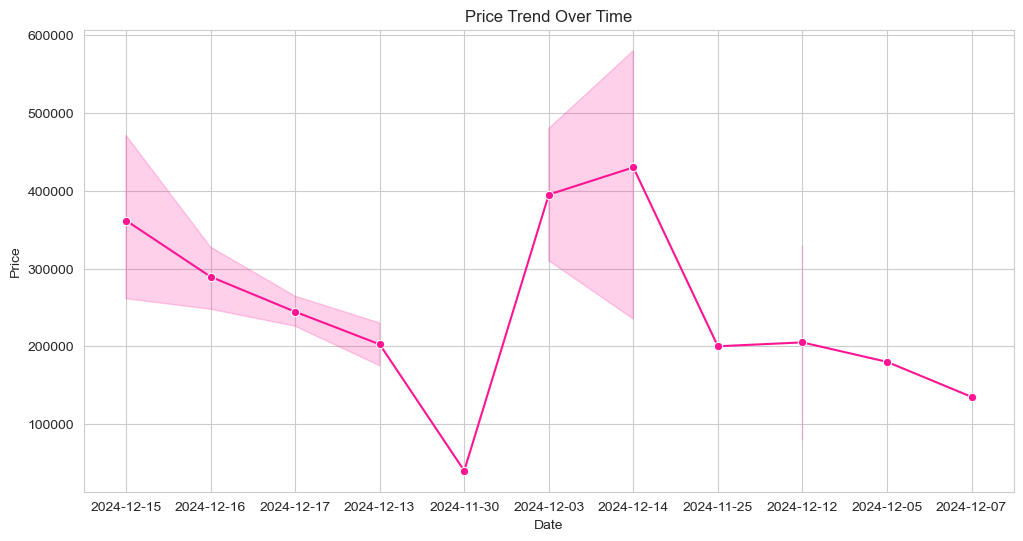

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Price', data=df, marker='o', color='#FF1493')  # Pink color
plt.title('Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

/var/folders/h1/w4wlfqg16874p57ddm4lpvzr0000gp/T/ipykernel_98131/3371053489.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='District', data=df, palette=pink_palette, order=df['District'].value_counts().index)
/var/folders/h1/w4wlfqg16874p57ddm4lpvzr0000gp/T/ipykernel_98131/3371053489.py:4: UserWarning: 
The palette list has fewer values (6) than needed (30) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='District', data=df, palette=pink_palette, order=df['District'].value_counts().index)


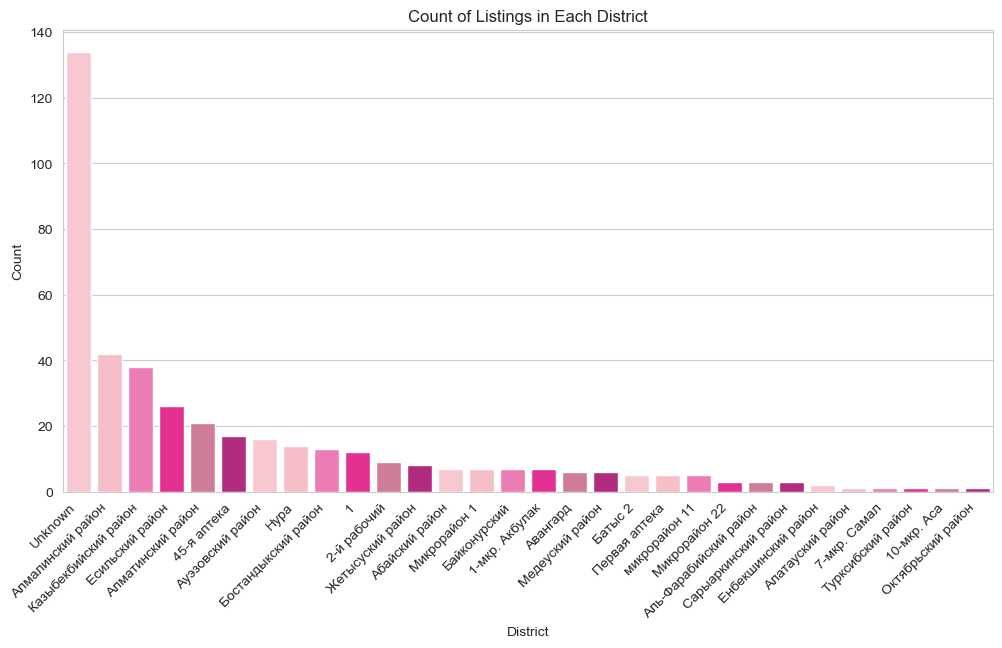

In [27]:
pink_palette = sns.color_palette(["#FFC0CB", "#FFB6C1", "#FF69B4", "#FF1493", "#DB7093", "#C71585"])

plt.figure(figsize=(12, 6))
sns.countplot(x='District', data=df, palette=pink_palette, order=df['District'].value_counts().index)
plt.title('Count of Listings in Each District')
plt.xlabel('District')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

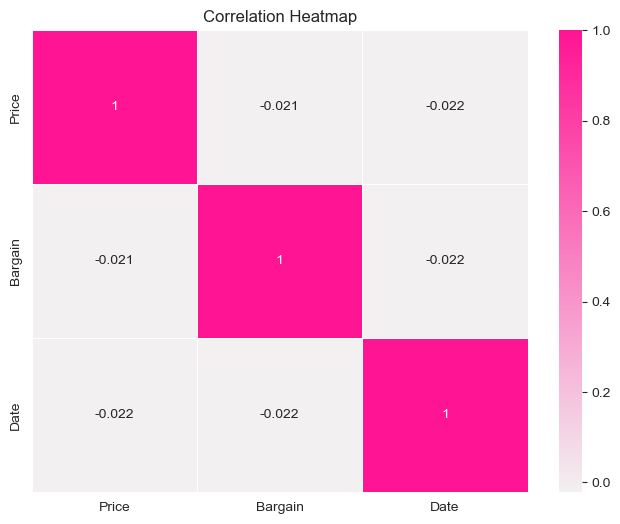

In [34]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') 
df['Date'] = df['Date'].astype('int64') // 10**9  
correlation_matrix = df[["Price","Bargain","Date"]].corr()

pink_colormap = sns.light_palette("#FF1493", as_cmap=True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=pink_colormap, linewidths=0.5)  # Custom pink gradient
plt.title('Correlation Heatmap')
plt.show()

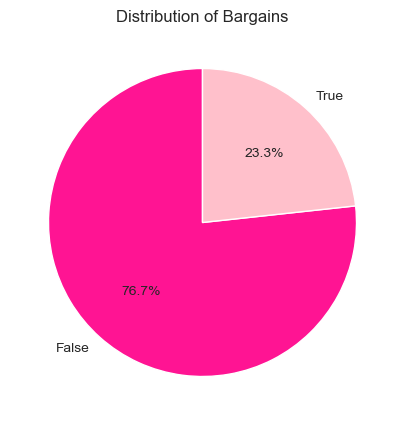

In [30]:
plt.figure(figsize=(10, 5))
bargain_counts = df['Bargain'].value_counts()
plt.pie(
    bargain_counts,
    labels=bargain_counts.index,
    autopct='%1.1f%%',
    colors=['#FF1493', '#FFC0CB'], 
    startangle=90
)
plt.title('Distribution of Bargains')
plt.show()

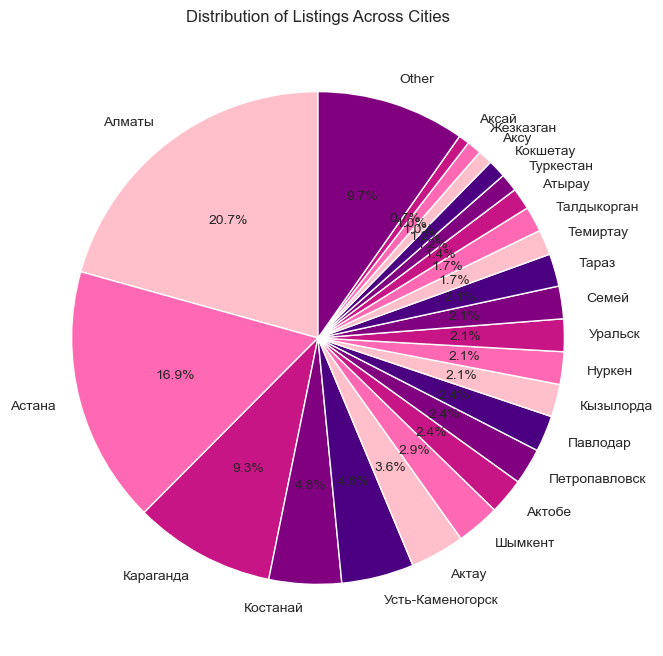

In [31]:
pink_purple_palette = sns.color_palette(["#FFC0CB", "#FF69B4", "#C71585", "#800080", "#4B0082"])

# Filter city counts and add 'Other' category
city_counts = df['City'].value_counts()
threshold = 0.005  # Define a threshold for grouping smaller parts

# Creating a new category 'Other' for cities with a percentage below the threshold
city_counts['Other'] = city_counts[city_counts / city_counts.sum() < threshold].sum()
city_counts = city_counts[city_counts / city_counts.sum() >= threshold]

# Pie chart for City distribution
plt.figure(figsize=(10, 8))
plt.pie(
    city_counts,
    labels=city_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=pink_purple_palette  # Apply the pink-to-purple palette
)
plt.title('Distribution of Listings Across Cities')
plt.show()